In [5]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [104]:
model = Word2Vec(sentences, size=10, window=10, min_count=1)

In [89]:
model.wv['1', '2']

array([[-0.53067875, -0.34931177, -0.7067168 ,  0.42861843,  0.11908285,
         1.5920243 ,  1.188003  , -0.66528285, -0.2701883 , -0.30796233],
       [-0.5130841 ,  0.84684634,  0.25144303, -0.05087771,  1.2857289 ,
        -0.12894988, -0.34307522, -1.0343809 ,  0.9952983 ,  0.57153547]],
      dtype=float32)

In [90]:
def plot_heatmat(model):
    plt.figure(figsize=(5,5))
    sns.heatmap( model.wv[model.wv.vocab], linewidths=0.5)

## Data

In [133]:
sentences = []

for i in range(100000):
    sentence = list(range(np.random.randint(0,29), np.random.randint(30,60)))
    sentence = [str(x) for x in sentence]
    sentences.append( sentence )

<IPython.core.display.Javascript object>


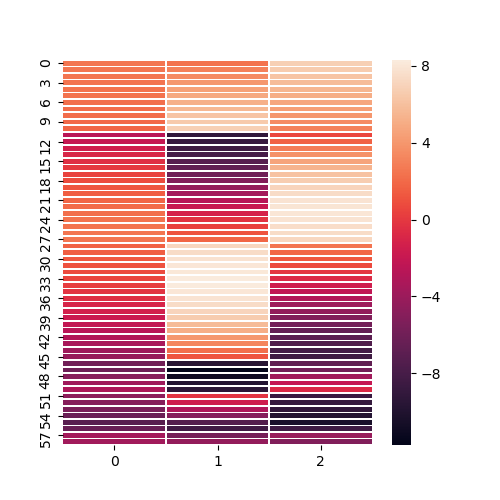

In [134]:
plot_heatmat( Word2Vec(sentences, size=3, window=1) );

## PCA

In [71]:
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)
    
    plt.figure(figsize=(5,5))
    plt.scatter( result[:,0], result[:,1])
    
    for i, word in enumerate(list(model.wv.vocab)):
        plt.annotate(word, xy=(result[i,0], result[i,1]))
    

<IPython.core.display.Javascript object>


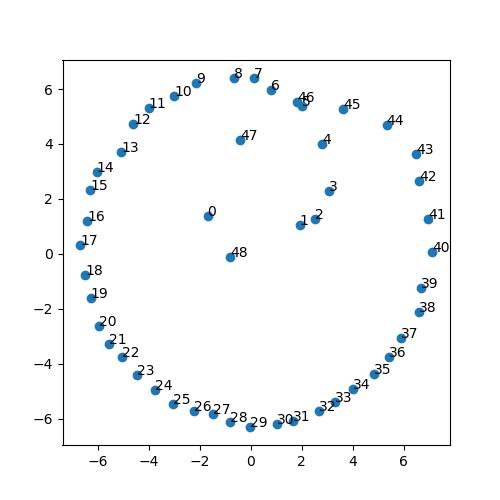

In [99]:
plot_pca( Word2Vec(sentences, size=50, window=1) )

In [140]:
model = Word2Vec(sentences, size=250, window=2)

In [144]:
model.wv.most_similar(positive=['30', '9'], negative=['10'], topn=3)

[('28', 0.34836286306381226),
 ('32', 0.34747594594955444),
 ('33', 0.3465769290924072)]